#Introduction, Set-up and Cleaning

This analysis is based on the dataset provided by user Seanny in Kaggle. A link to the data set is here https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction. The purpopse of this analysis is to try to predict the approval of credit based on the information in the provided csv file. This analysis will first contain an exploratory analysis part where I will try to manually find any patterns that might suggest more or less influence on credit approval strategies. The second part of this file will be a machine learning model designed to predict the approval rating of any indivdual based on the information from the credit record file.

##Setting up the data for analysis

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_val = pd.read_csv('credit_record.csv')
df_train = pd.read_csv('application_record.csv')

In [9]:
#Here I join the two files on the ID tag as I want to try to find any correlations
data_full = df_train.set_index('ID').join(df_val.set_index('ID'))

###OneHotEncoding

In order to convert the categorical columns to a numerical value for the model I use OneHotEncoding to convert the values of the categories to ones and zeros. This also helps us to find any obvious correlations between categories and approval rating.

In [10]:
def OneHotEncode(data,columns):
    return pd.get_dummies(data,columns = columns)

category_cols = [collname for collname in data_full.columns if data_full[collname].dtype == "object"]
data_full = OneHotEncode(data_full, category_cols)

#Here I print the first five rows to see that everything looks okay.
data_full.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,...,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
ID,,,,,,,,,,,,,,,,,,,,,
5008804,0,427500.0,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,1,0
5008804,0,427500.0,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,-1.0,...,0,0,0,0,0,0,0,0,1,0
5008804,0,427500.0,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,-2.0,...,0,0,0,0,0,0,0,0,1,0
5008804,0,427500.0,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,-3.0,...,0,0,0,0,0,0,0,0,1,0
5008804,0,427500.0,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,-4.0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
data_full[data_full.isna().any(axis=1)]

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,...,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
ID,,,,,,,,,,,,,,,,,,,,,
5150488,0,202500.0,-19398.0,-2166.0,1.0,0.0,0.0,0.0,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
5150489,0,202500.0,-19398.0,-2166.0,1.0,0.0,0.0,0.0,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
5150490,0,202500.0,-19398.0,-2166.0,1.0,0.0,0.0,0.0,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
5150491,0,180000.0,-21713.0,-3780.0,1.0,0.0,0.0,0.0,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
5150508,0,148500.0,-20544.0,-2835.0,1.0,1.0,1.0,0.0,1.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840314,0,225000.0,-10943.0,-2581.0,1.0,0.0,0.0,0.0,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
6840315,0,225000.0,-10943.0,-2581.0,1.0,0.0,0.0,0.0,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
6840316,0,225000.0,-10943.0,-2581.0,1.0,0.0,0.0,0.0,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0


Here we can see that there are a lot of rows where the MONTH_BALANCE is NaN. To make the analysis easier I drop the MONTHS_BALANCE column since I believe it does not help in determining wether or not the crediter is a good or bad creditor, it just states how current the data is. This is something that should be considered if the ML is applied to an applicant, that before the model is used, the data should be up to date. However this should not impact the training of the model.

In [62]:
data_full = data_full.drop(['MONTHS_BALANCE'], axis=1)
data_full.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,...,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
ID,,,,,,,,,,,,,,,,,,,,,
5008804,0,427500.0,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,0,...,0,0,0,0,0,0,0,0,1,0
5008804,0,427500.0,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,0,...,0,0,0,0,0,0,0,0,1,0
5008804,0,427500.0,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,0,...,0,0,0,0,0,0,0,0,1,0
5008804,0,427500.0,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,0,...,0,0,0,0,0,0,0,0,1,0
5008804,0,427500.0,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,0,...,0,0,0,0,0,0,0,0,1,0


In [64]:
data_full[data_full.isna().any(axis=1)]

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,...,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
ID,,,,,,,,,,,,,,,,,,,,,
5683984,0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,0


In [69]:
data_full = data_full.drop(5683984)


In [74]:
data_full[data_full.isna().any(axis=1)].count().sort_values(ascending=False)

CNT_CHILDREN                               0
OCCUPATION_TYPE_Managers                   0
NAME_HOUSING_TYPE_Office apartment         0
NAME_HOUSING_TYPE_Rented apartment         0
NAME_HOUSING_TYPE_With parents             0
                                          ..
NAME_FAMILY_STATUS_Civil marriage          0
NAME_FAMILY_STATUS_Married                 0
NAME_FAMILY_STATUS_Separated               0
NAME_FAMILY_STATUS_Single / not married    0
STATUS_X                                   0
Length: 63, dtype: int64

#Analysis

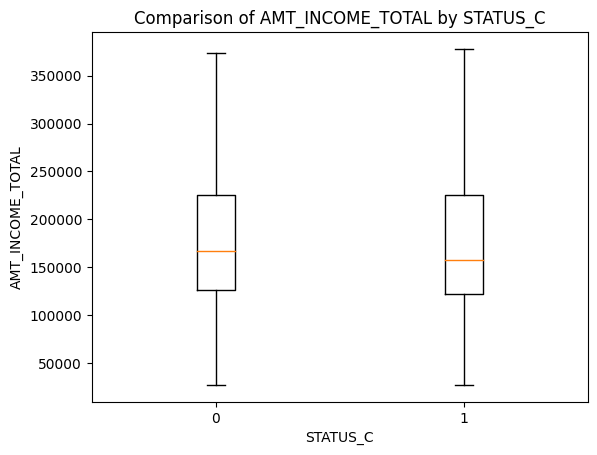

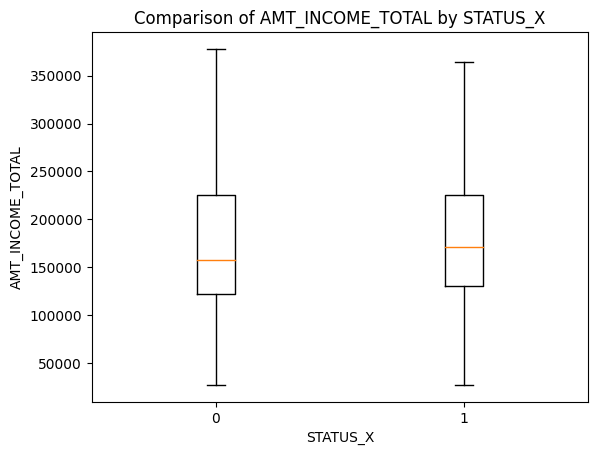

In [37]:
# group the data by 'STATUS_C' and select the 'AMT_INCOME_TOTAL' column
grouped_data_c = data_full.groupby('STATUS_C')['AMT_INCOME_TOTAL']

# create a boxplot of the two groups using matplotlib
fig, ax = plt.subplots()
ax.boxplot([grouped_data_c.get_group(0), grouped_data_c.get_group(1)], showfliers=False)
ax.set_xticklabels(['0', '1'])
ax.set_xlabel('STATUS_C')
ax.set_ylabel('AMT_INCOME_TOTAL')
ax.set_title('Comparison of AMT_INCOME_TOTAL by STATUS_C')
plt.show()

# group the data by 'STATUS_C' and select the 'AMT_INCOME_TOTAL' column
grouped_data_x = data_full.groupby('STATUS_X')['AMT_INCOME_TOTAL']

# create a boxplot of the two groups using matplotlib
fig, ax = plt.subplots()
ax.boxplot([grouped_data_x.get_group(0), grouped_data_x.get_group(1)], showfliers=False)
ax.set_xticklabels(['0', '1'])
ax.set_xlabel('STATUS_X')
ax.set_ylabel('AMT_INCOME_TOTAL')
ax.set_title('Comparison of AMT_INCOME_TOTAL by STATUS_X')
plt.show()

In [40]:
print("Median of group with loan: " + str(grouped_data_x.get_group(0).median()), "\nMedian of group without loan: " + str(grouped_data_x.get_group(1).median()))

Median of group with loan: 157500.0 
Median of group without loan: 171000.0


From this we can assume that if a household has paid their credit or not is not really dependent on the income of the household. However there does seem to be a difference between not having a loan and having higher income. 

In [42]:
print(grouped_data_x.get_group(0).count(), grouped_data_x.get_group(1).count())

731251 145036


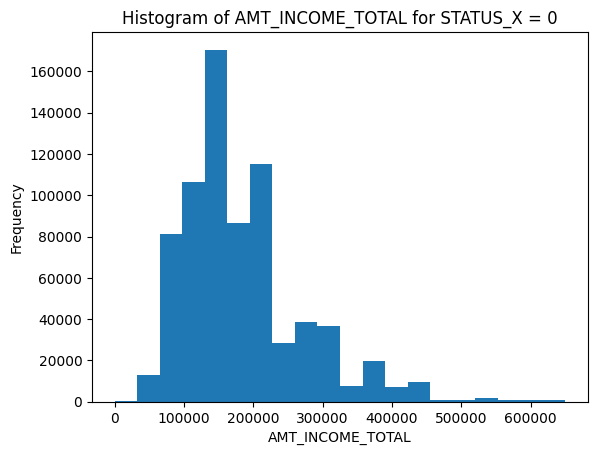

In [84]:
# get the data for the group with STATUS_C = 0
group_0_data = data_full.loc[data_full['STATUS_X'] == 0, 'AMT_INCOME_TOTAL']

# create a histogram of the group_0_data using matplotlib
fig, ax = plt.subplots()
ax.hist(group_0_data, bins=20, range=(0, 650000))
ax.set_xlabel('AMT_INCOME_TOTAL')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of AMT_INCOME_TOTAL for STATUS_X = 0')
plt.show()

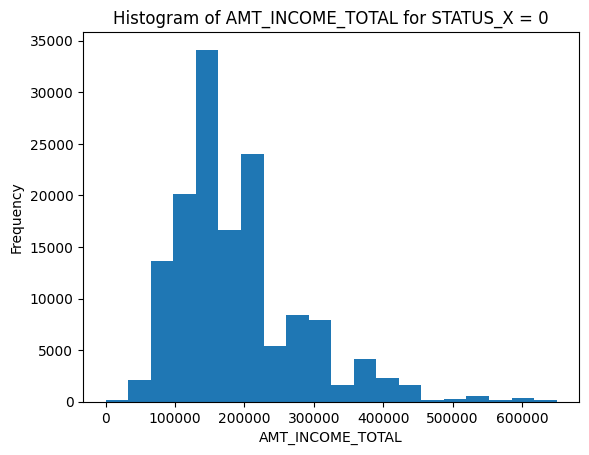

In [85]:
# get the data for the group with STATUS_C = 0
group_0_data = data_full.loc[data_full['STATUS_X'] == 1, 'AMT_INCOME_TOTAL']

# create a histogram of the group_0_data using matplotlib
fig, ax = plt.subplots()
ax.hist(group_0_data, bins=20, range=(0, 650000))
ax.set_xlabel('AMT_INCOME_TOTAL')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of AMT_INCOME_TOTAL for STATUS_X = 0')
plt.show()

In [86]:
# compute the correlation matrix for the DataFrame
corr_matrix = data_full.corr()
corr_squared = corr_matrix[['STATUS_X']]**2
filtered_corr_squared = corr_squared[corr_squared['STATUS_X'] > 0.1].dropna()

In [87]:
print(filtered_corr_squared)

          STATUS_X
STATUS_C  0.117508
STATUS_X  1.000000
